In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./data/annotated/project-1-at-2024-05-21-15-37-bb0b128d.csv')
df['label'].iloc[0]

'[{"start":33,"end":39,"text":"Москве","labels":["LOC_CITY"]},{"start":53,"end":76,"text":"Ломоносовский проспект»","labels":["LOC"]}]'

In [11]:
has_annotations = df[~df['label'].isnull()]
has_annotations.describe()

,annotation_id,annotator,id,lead_time
count,97.00000,97.0,97.000000,97.000000
mean,50.71134,1.0,55.463918,11.881062
std,28.58101,0.0,32.446450,8.663891
min,1.00000,1.0,1.000000,1.691000
25%,27.00000,1.0,28.000000,5.424000
50%,51.00000,1.0,54.000000,9.108000
75%,75.00000,1.0,83.000000,17.069000
max,99.00000,1.0,112.000000,53.041000


In [12]:
has_annotations

,annotation_id,annotator,created_at,id,label,lead_time,text,updated_at
0,1,1,2024-05-09T14:49:30.937505Z,1,"[{""start"":33,""end"":39,""text"":""Москве"",""labels""...",11.596,Трубу с горячей водой прорвало в Москве около ...,2024-05-09T14:49:30.937583Z
2,2,1,2024-05-10T11:06:05.250606Z,3,"[{""start"":247,""end"":255,""text"":""Украины."",""lab...",19.274,Политолог Георгий Бовт:Эдак можно второй соста...,2024-05-10T11:06:05.250630Z
3,3,1,2024-05-10T11:06:08.129832Z,4,"[{""start"":18,""end"":20,""text"":""РФ"",""labels"":[""L...",14.092,"❗️В правительстве РФ опасаются ""неуправляемого...",2024-05-10T11:06:08.129855Z
4,4,1,2024-05-10T11:06:22.996942Z,5,"[{""start"":669,""end"":680,""text"":""Ставрополья"",""...",12.511,"За каждой задачей, приказом или указом должно ...",2024-05-10T11:06:22.996966Z
5,5,1,2024-05-10T11:07:03.589454Z,6,"[{""start"":91,""end"":97,""text"":""России"",""labels""...",38.681,BRIEFLY. Акценты.В материале The Washington Ti...,2024-05-10T11:07:03.589475Z
...,...,...,...,...,...,...,...,...
94,95,1,2024-05-21T15:36:24.866268Z,108,"[{""start"":190,""end"":197,""text"":""России,"",""labe...",18.588,Японская компания Japan Tobacco (международные...,2024-05-21T15:36:24.866289Z
95,96,1,2024-05-21T15:36:32.407195Z,109,"[{""start"":7,""end"":13,""text"":""Алматы"",""labels"":...",6.552,Власти Алматы второй год подряд не разрешили п...,2024-05-21T15:36:32.407219Z
96,97,1,2024-05-21T15:36:48.514292Z,110,"[{""start"":17,""end"":24,""text"":""Австрии"",""labels...",15.200,Reuters: Власти Австрии призвали Raiffeisen B...,2024-05-21T15:36:48.514314Z
97,98,1,2024-05-21T15:36:55.411849Z,111,"[{""start"":7,""end"":15,""text"":""Удмуртии"",""labels...",5.424,Власти Удмуртии решили отменить Парад Победы и...,2024-05-21T15:36:55.411872Z


In [17]:
has_annotations['text'].apply(lambda x: x.split(' ')).apply(len).describe()

count     97.000000
mean      56.329897
std       50.963165
min        4.000000
25%       21.000000
50%       33.000000
75%       86.000000
max      251.000000
Name: text, dtype: float64

In [21]:
import json

has_annotations['labels'] = has_annotations['label'].apply(json.loads)

C:\Users\Nick\AppData\Local\Temp\ipykernel_17512\1017649932.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  has_annotations['labels'] = has_annotations['label'].apply(json.loads)


In [23]:
has_annotations['labels'].iloc[0]

[{'start': 33, 'end': 39, 'text': 'Москве', 'labels': ['LOC_CITY']},
 {'start': 53,
  'end': 76,
  'text': 'Ломоносовский проспект»',
  'labels': ['LOC']}]

In [26]:
has_annotations['tags'] = has_annotations['labels'].apply(
    lambda x: list(map(lambda y: y['labels'], x)))
has_annotations['tags']

C:\Users\Nick\AppData\Local\Temp\ipykernel_17512\2786226729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  has_annotations['tags'] =  has_annotations['labels'].apply(


0                                   [[LOC_CITY], [LOC]]
2                        [[LOC_COUNTRY], [LOC_COUNTRY]]
3     [[LOC_COUNTRY], [LOC_COUNTRY], [LOC_COUNTRY], ...
4                                        [[LOC_REGION]]
5     [[LOC_COUNTRY], [LOC_COUNTRY], [LOC_COUNTRY], ...
                            ...                        
94    [[LOC_COUNTRY], [LOC_COUNTRY], [LOC_CITY], [LO...
95                          [[LOC_CITY], [LOC_COUNTRY]]
96    [[LOC_COUNTRY], [LOC_COUNTRY], [LOC_COUNTRY], ...
97                                       [[LOC_REGION]]
98         [[LOC_PLACES], [LOC_COUNTRY], [LOC_COUNTRY]]
Name: tags, Length: 97, dtype: object

In [33]:
# pd.DataFrame(has_annotations['tags'].to_list(), columns=['LOC_COUNTRY', 'LOC_REGION', 'LOC_CITY', 'LOC_DISTRICT', 'LOC_STREET', 'LOC_BUILDING', 'LOC', 'LOC_PLACES', 'LOC_METRO'])
df2 = has_annotations['tags'].apply(pd.Series)
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,[LOC_CITY],[LOC],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[LOC_COUNTRY],[LOC_COUNTRY],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[LOC_COUNTRY],[LOC_COUNTRY],[LOC_COUNTRY],[LOC_COUNTRY],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[LOC_REGION],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,[LOC_COUNTRY],[LOC_COUNTRY],[LOC_COUNTRY],[LOC_CITY],[LOC_COUNTRY],[LOC_COUNTRY],[LOC_CITY],[LOC_COUNTRY],[LOC_COUNTRY],[LOC_COUNTRY],[LOC_COUNTRY],[LOC_COUNTRY],[LOC_COUNTRY],NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,[LOC_COUNTRY],[LOC_COUNTRY],[LOC_CITY],[LOC_COUNTRY],[LOC_COUNTRY],[LOC_COUNTRY],[LOC_COUNTRY],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,[LOC_CITY],[LOC_COUNTRY],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,[LOC_COUNTRY],[LOC_COUNTRY],[LOC_COUNTRY],[LOC_CITY],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,[LOC_REGION],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
has_annotations['tags'].tolist()

[[['LOC_CITY'], ['LOC']],
 [['LOC_COUNTRY'], ['LOC_COUNTRY']],
 [['LOC_COUNTRY'], ['LOC_COUNTRY'], ['LOC_COUNTRY'], ['LOC_COUNTRY']],
 [['LOC_REGION']],
 [['LOC_COUNTRY'],
  ['LOC_COUNTRY'],
  ['LOC_COUNTRY'],
  ['LOC_CITY'],
  ['LOC_COUNTRY'],
  ['LOC_COUNTRY'],
  ['LOC_CITY'],
  ['LOC_COUNTRY'],
  ['LOC_COUNTRY'],
  ['LOC_COUNTRY'],
  ['LOC_COUNTRY'],
  ['LOC_COUNTRY'],
  ['LOC_COUNTRY']],
 [['LOC_CITY']],
 [['LOC_COUNTRY'],
  ['LOC_COUNTRY'],
  ['LOC'],
  ['LOC_COUNTRY'],
  ['LOC_COUNTRY'],
  ['LOC_COUNTRY'],
  ['LOC_COUNTRY'],
  ['LOC_COUNTRY'],
  ['LOC_CITY']],
 [['LOC_COUNTRY'],
  ['LOC_COUNTRY'],
  ['LOC_COUNTRY'],
  ['LOC_COUNTRY'],
  ['LOC'],
  ['LOC_COUNTRY']],
 [['LOC_CITY']],
 [['LOC_COUNTRY'], ['LOC_COUNTRY'], ['LOC'], ['LOC_COUNTRY']],
 [['LOC_COUNTRY'], ['LOC']],
 [['LOC_COUNTRY'],
  ['LOC_COUNTRY'],
  ['LOC_COUNTRY'],
  ['LOC_COUNTRY'],
  ['LOC_COUNTRY'],
  ['LOC_CITY'],
  ['LOC_COUNTRY'],
  ['LOC_COUNTRY']],
 [['LOC'], ['LOC_STREET']],
 [['LOC_COUNTRY'],
  ['LOC'],
  [

In [46]:
import itertools

tags = list(itertools.chain(*list(itertools.chain(*has_annotations['tags'].tolist()))))
tags

['LOC_CITY',
 'LOC',
 'LOC_COUNTRY',
 'LOC_COUNTRY',
 'LOC_COUNTRY',
 'LOC_COUNTRY',
 'LOC_COUNTRY',
 'LOC_COUNTRY',
 'LOC_REGION',
 'LOC_COUNTRY',
 'LOC_COUNTRY',
 'LOC_COUNTRY',
 'LOC_CITY',
 'LOC_COUNTRY',
 'LOC_COUNTRY',
 'LOC_CITY',
 'LOC_COUNTRY',
 'LOC_COUNTRY',
 'LOC_COUNTRY',
 'LOC_COUNTRY',
 'LOC_COUNTRY',
 'LOC_COUNTRY',
 'LOC_CITY',
 'LOC_COUNTRY',
 'LOC_COUNTRY',
 'LOC',
 'LOC_COUNTRY',
 'LOC_COUNTRY',
 'LOC_COUNTRY',
 'LOC_COUNTRY',
 'LOC_COUNTRY',
 'LOC_CITY',
 'LOC_COUNTRY',
 'LOC_COUNTRY',
 'LOC_COUNTRY',
 'LOC_COUNTRY',
 'LOC',
 'LOC_COUNTRY',
 'LOC_CITY',
 'LOC_COUNTRY',
 'LOC_COUNTRY',
 'LOC',
 'LOC_COUNTRY',
 'LOC_COUNTRY',
 'LOC',
 'LOC_COUNTRY',
 'LOC_COUNTRY',
 'LOC_COUNTRY',
 'LOC_COUNTRY',
 'LOC_COUNTRY',
 'LOC_CITY',
 'LOC_COUNTRY',
 'LOC_COUNTRY',
 'LOC',
 'LOC_STREET',
 'LOC_COUNTRY',
 'LOC',
 'LOC_COUNTRY',
 'LOC_COUNTRY',
 'LOC_COUNTRY',
 'LOC_COUNTRY',
 'LOC_COUNTRY',
 'LOC_COUNTRY',
 'LOC_COUNTRY',
 'LOC_COUNTRY',
 'LOC_COUNTRY',
 'LOC_CITY',
 'LOC_CITY

In [49]:
from collections import Counter

Counter(tags).keys(), Counter(tags).values()

(dict_keys(['LOC_CITY', 'LOC', 'LOC_COUNTRY', 'LOC_REGION', 'LOC_STREET', 'LOC_PLACES', 'LOC_DISTRICT']),
 dict_values([51, 17, 202, 22, 3, 17, 3]))

In [57]:
df_stat = pd.DataFrame.from_dict(Counter(tags), orient='index', columns=['count']).sort_values(by='count', ascending=False)
df_stat

,count
LOC_COUNTRY,202
LOC_CITY,51
LOC_REGION,22
LOC,17
LOC_PLACES,17
LOC_STREET,3
LOC_DISTRICT,3


<Axes: >

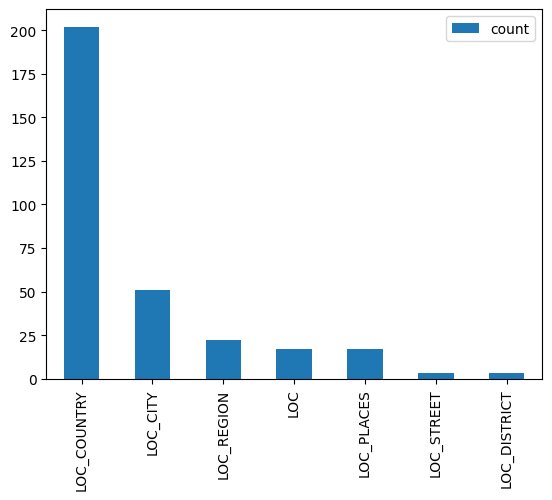

In [58]:
df_stat.plot(kind='bar')